# xuất các ảnh thành file csv

In [1]:
import os
import numpy as np
from PIL import Image
import pandas as pd

# data = []
# for label in range(10):
#     image_folder = f'train/{label}'
#     if not os.path.exists(image_folder):
#         continue
#     image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
#     for img_name in image_files:
#         img_path = os.path.join(image_folder, img_name)
#         img = Image.open(img_path).convert('L')
#         img_array = np.array(img).flatten()
#         row = [label] + img_array.tolist()
#         data.append(row)

# if data:
#     columns = ['label'] + [f'pixel{i+1}' for i in range(len(data[0])-1)]
#     df_images = pd.DataFrame(data, columns=columns)
#     df_images.to_csv('train_all_classes.csv', index=False)


In [2]:
# data_test = []
# for label in range(10):
#     image_folder_test = f'test/{label}'
#     if not os.path.exists(image_folder_test):
#         continue
#     image_files_test = [f for f in os.listdir(image_folder_test) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
#     for img_name_test in image_files_test:
#         img_path_test = os.path.join(image_folder_test, img_name_test)
#         img_test = Image.open(img_path_test).convert('L')
#         img_array_test = np.array(img_test).flatten()
#         row_test = [label] + img_array_test.tolist()
#         data_test.append(row_test)

# if data_test:
#     df_images_test = pd.DataFrame(data_test, columns=columns)
#     df_images_test.to_csv('test_all_classes.csv', index=False)

# import dữ liệu 

In [3]:
train = pd.read_csv('train_all_classes.csv')
test = pd.read_csv('test_all_classes.csv')

In [4]:
train.head(5)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
0,0,201,79,63,197,127,192,113,255,135,...,0,111,1,113,1,110,0,106,5,93
1,0,237,116,10,244,131,57,122,220,175,...,5,0,3,0,0,4,0,4,0,2
2,0,131,252,139,28,0,139,245,2,254,...,147,255,255,0,2,87,243,6,34,239
3,0,57,140,9,9,141,10,83,131,139,...,0,1,3,0,4,0,0,0,0,1
4,0,128,82,112,3,243,0,116,53,112,...,0,0,4,0,41,45,118,111,108,96


In [5]:
test.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
0,0,0,3,0,42,0,0,1,0,1,...,2,2,0,0,3,0,0,2,1,0
1,0,0,3,0,2,6,0,4,5,0,...,0,2,0,0,1,0,1,4,0,3
2,0,5,64,2,97,176,80,90,2,84,...,191,105,155,170,244,201,194,119,198,126
3,0,67,3,0,0,1,134,3,2,3,...,26,155,70,106,172,4,208,29,45,55
4,0,188,28,0,0,48,63,11,22,96,...,81,73,65,72,69,89,77,68,78,68


# trực quan 

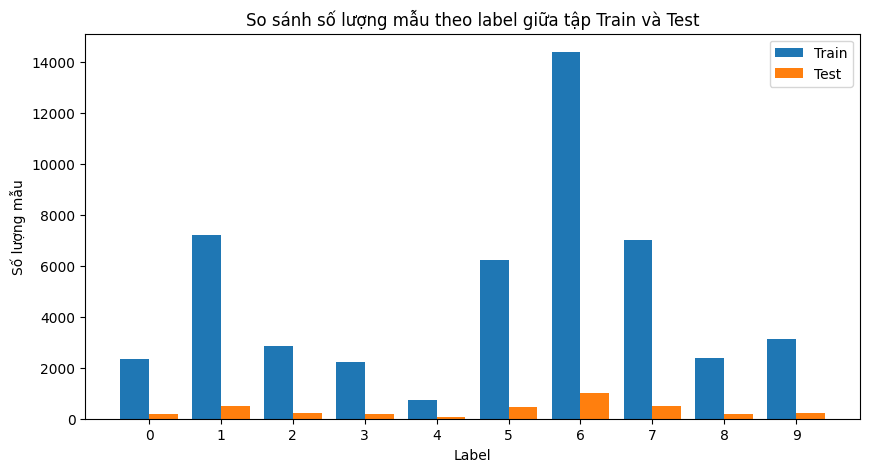

In [6]:
import matplotlib.pyplot as plt

# Đếm số lượng mẫu cho từng nhãn trong tập train và test
train_label_counts = train['label'].value_counts().sort_index()
test_label_counts = test['label'].value_counts().sort_index()

# Vẽ biểu đồ so sánh
plt.figure(figsize=(10, 5))
plt.bar(train_label_counts.index - 0.2, train_label_counts.values, width=0.4, label='Train', align='center')
plt.bar(test_label_counts.index + 0.2, test_label_counts.values, width=0.4, label='Test', align='center')
plt.xlabel('Label')
plt.ylabel('Số lượng mẫu')
plt.title('So sánh số lượng mẫu theo label giữa tập Train và Test')
plt.xticks(train_label_counts.index)
plt.legend()
plt.show()

## chỉnh sửa bộ dữ liệu

vì số lượng dữ liệu của 6 7 quá lớn và có nhiều nhiễu nên bỏ đi ilabel 6 7 cũng như giảm các cột quá nhiều còn 3000

In [ ]:
# Giảm số lượng mẫu cho các label 1, 5, 6, 7 xuống còn 3000
labels_to_reduce = [1, 5, 6, 7]
train = train.groupby('label', group_keys=False).apply(
    lambda x: x.sample(n=3000) if x.name in labels_to_reduce else x
)
train = train[~train['label'].isin([6, 7])]
test = test[~test['label'].isin([6, 7])]
# Kiểm tra số lượng mẫu sau khi giảm
print(train['label'].value_counts())

label
9    3114
1    3000
5    3000
2    2832
8    2398
0    2341
3    2228
4     738
Name: count, dtype: int64


C:\Users\voanh\AppData\Local\Temp\ipykernel_16192\4013906024.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train = train.groupby('label', group_keys=False).apply(


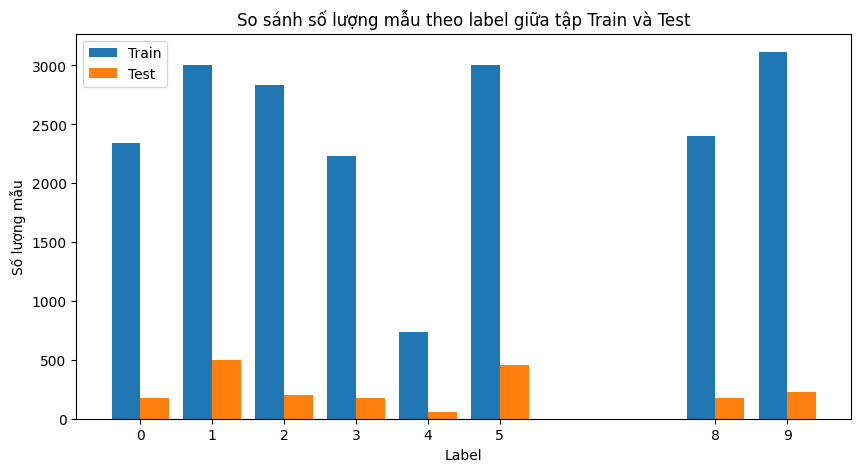

In [8]:
import matplotlib.pyplot as plt

# Đếm số lượng mẫu cho từng nhãn trong tập train và test
train_label_counts = train['label'].value_counts().sort_index()
test_label_counts = test['label'].value_counts().sort_index()

# Vẽ biểu đồ so sánh
plt.figure(figsize=(10, 5))
plt.bar(train_label_counts.index - 0.2, train_label_counts.values, width=0.4, label='Train', align='center')
plt.bar(test_label_counts.index + 0.2, test_label_counts.values, width=0.4, label='Test', align='center')
plt.xlabel('Label')
plt.ylabel('Số lượng mẫu')
plt.title('So sánh số lượng mẫu theo label giữa tập Train và Test')
plt.xticks(train_label_counts.index)
plt.legend()
plt.show()

# Mô hình RandomForestClassifier

Mô hình có độ chính xác khá ổn

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Chuẩn bị dữ liệu
X_train = train.drop('label', axis=1)
y_train = train['label']
X_test = test.drop('label', axis=1)
y_test = test['label']

# Huấn luyện mô hình
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.4f}')

Accuracy on test set: 0.8834


## xem các kết quả test

c:\Users\voanh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


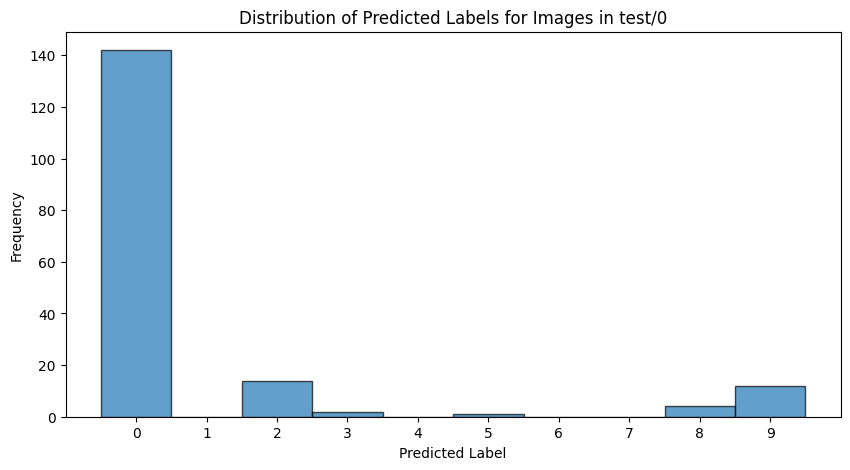

c:\Users\voanh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


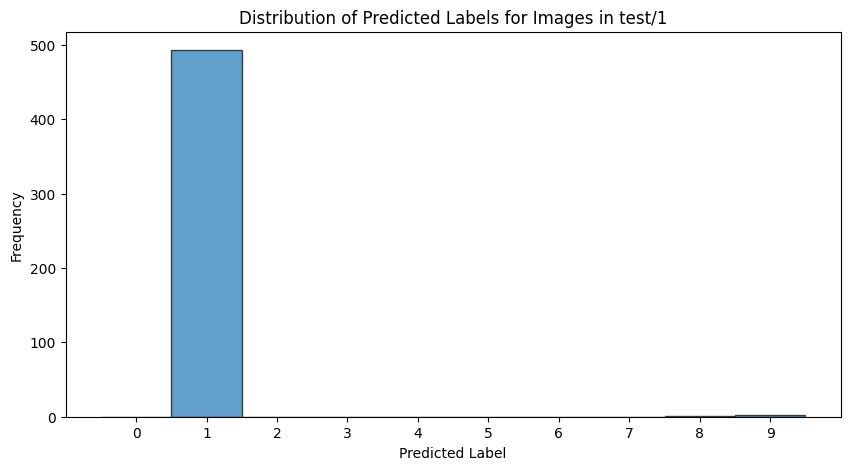

c:\Users\voanh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


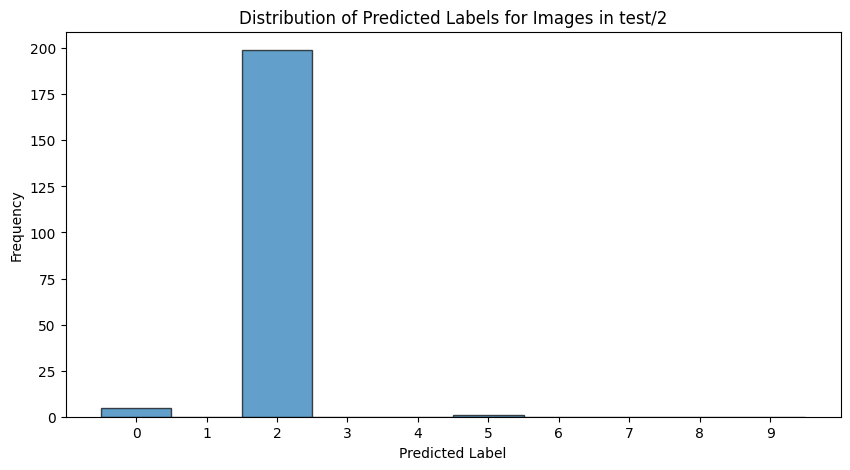

c:\Users\voanh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


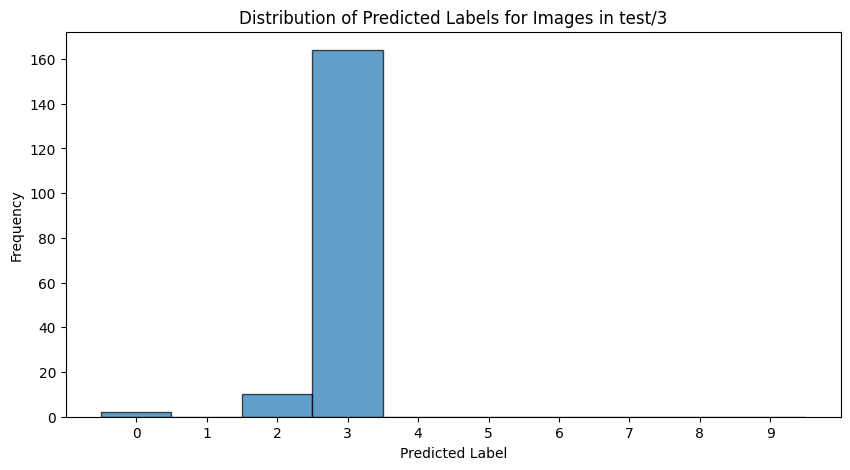

c:\Users\voanh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


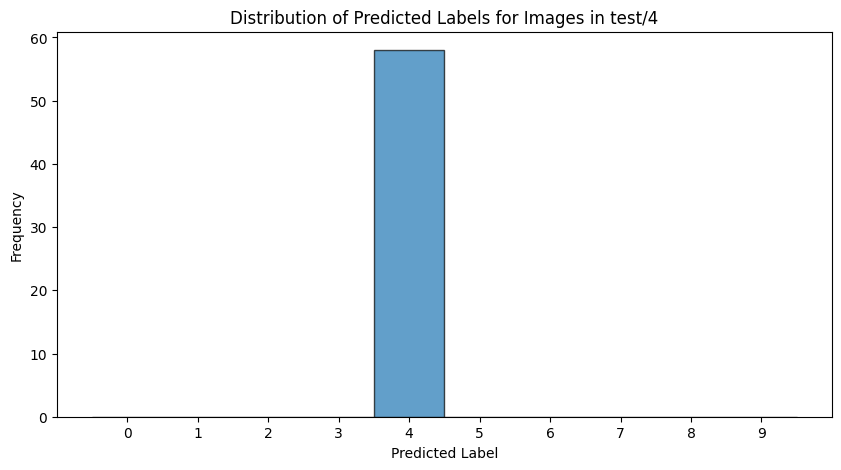

c:\Users\voanh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


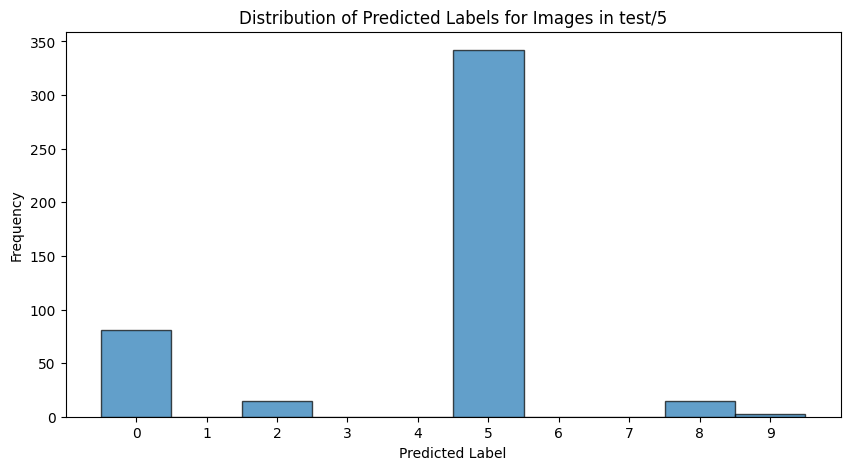

c:\Users\voanh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


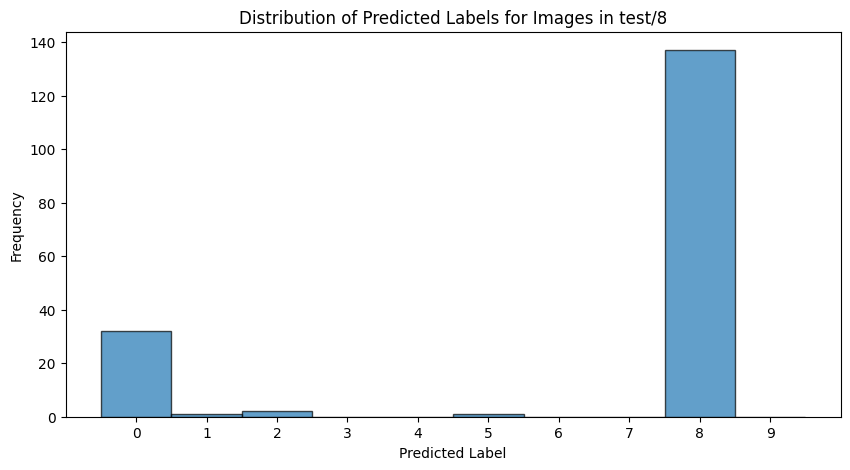

c:\Users\voanh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


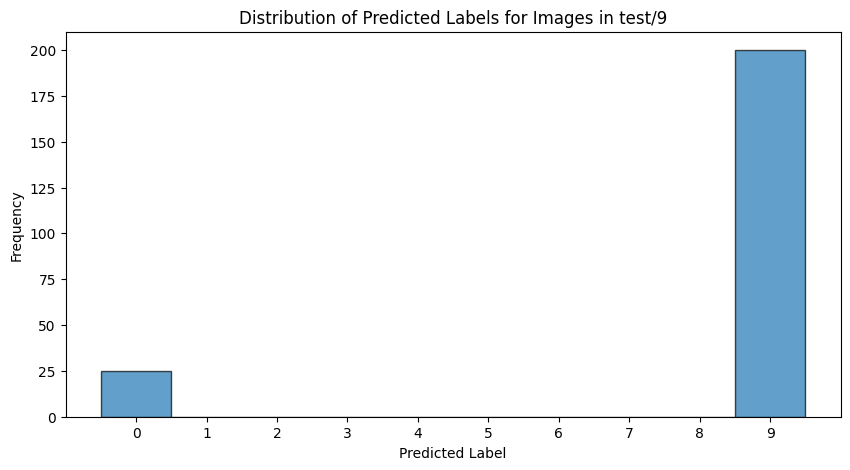

In [11]:
# Lặp qua các thư mục từ test/1 đến test/9
for label in range(0, 10):
    if label == 6 or label == 7:
        continue
    image_folder_test = f'test/{label}'
    if not os.path.exists(image_folder_test):
        print(f"Folder {image_folder_test} does not exist.")
        continue

    # Lấy các ảnh từ thư mục
    image_files_test = [f for f in os.listdir(image_folder_test) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Chuẩn bị dữ liệu ảnh
    data_test = []
    for img_name_test in image_files_test:
        img_path_test = os.path.join(image_folder_test, img_name_test)
        img_test = Image.open(img_path_test).convert('L')
        img_array_test = np.array(img_test).flatten()
        data_test.append(img_array_test)

    # Dự đoán nhãn cho các ảnh
    if data_test:
        test_pixels = pd.DataFrame(data_test)
        predicted_labels = model.predict(test_pixels)

        # Hiển thị biểu đồ phân bố nhãn dự đoán
        plt.figure(figsize=(10, 5))
        plt.hist(predicted_labels, bins=np.arange(11) - 0.5, edgecolor='black', alpha=0.7)
        plt.xticks(range(10))
        plt.xlabel('Predicted Label')
        plt.ylabel('Frequency')
        plt.title(f'Distribution of Predicted Labels for Images in test/{label}')
        plt.show()
    else:
        print(f"No images found in {image_folder_test}.")

## kiểm tra với  dữ liệu thực ở trong data và ảnh 

In [12]:
# Lấy 10 dòng đầu tiên từ tập test
test_sample = test.iloc[:10]

# Tách dữ liệu pixel và reshape để dự đoán
test_pixels_sample = test_sample.drop('label', axis=1).values

# Dự đoán nhãn cho 10 dòng đầu tiên
predicted_labels_sample = model.predict(test_pixels_sample)

# Hiển thị nhãn thực tế và nhãn dự đoán
for i, (true_label, predicted_label) in enumerate(zip(test_sample['label'], predicted_labels_sample)):
    print(f"Sample {i}: True label = {true_label}, Predicted label = {predicted_label}")

Sample 0: True label = 0, Predicted label = 0
Sample 1: True label = 0, Predicted label = 0
Sample 2: True label = 0, Predicted label = 0
Sample 3: True label = 0, Predicted label = 0
Sample 4: True label = 0, Predicted label = 0
Sample 5: True label = 0, Predicted label = 0
Sample 6: True label = 0, Predicted label = 0
Sample 7: True label = 0, Predicted label = 0
Sample 8: True label = 0, Predicted label = 0
Sample 9: True label = 0, Predicted label = 0


c:\Users\voanh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [27]:
# Lấy 10 ảnh từ thư mục test/0
image_folder_test_0 = 'test/0'
image_files_test_0 = [f for f in os.listdir(image_folder_test_0) if f.lower().endswith(('.png', '.jpg', '.jpeg'))][:10]

# Chuẩn bị dữ liệu ảnh
data_test_0 = []
for img_name_test_0 in image_files_test_0:
    img_path_test_0 = os.path.join(image_folder_test_0, img_name_test_0)
    img_test_0 = Image.open(img_path_test_0).convert('L')
    img_array_test_0 = np.array(img_test_0).flatten()
    data_test_0.append(img_array_test_0)

# Dự đoán nhãn cho các ảnh
if data_test_0:
    test_pixels_0 = pd.DataFrame(data_test_0)
    predicted_labels_0 = model.predict(test_pixels_0)

    # Hiển thị nhãn dự đoán
    for i, (img_name, predicted_label) in enumerate(zip(image_files_test_0, predicted_labels_0)):
        print(f"Image {i + 1} ({img_name}): Predicted label = {predicted_label}")
else:
    print("No images found in test/0.")

Image 1 (02c25a63d58fc12dea8fa4ecdb832cc0.jpg): Predicted label = 0
Image 2 (02ee38dabd3f5ac5f7ffe40862f20929.jpg): Predicted label = 0
Image 3 (0327301655f2e1c6bdbd4536a3349216.jpg): Predicted label = 0
Image 4 (05c80df199d2e915780ad9af3533410e.jpg): Predicted label = 0
Image 5 (061c7717151a1093b6ddcb428787ce7d.jpg): Predicted label = 0
Image 6 (068e71ba919a32cae07ae9511fecc811.jpg): Predicted label = 0
Image 7 (06b43cb00b61be55b6d100b15edfbc39.jpg): Predicted label = 0
Image 8 (06b632536d5f6892417e9043402d4cfd.jpg): Predicted label = 0
Image 9 (0799ab99bad9c536c78c5227fbe4d9ad.jpg): Predicted label = 0
Image 10 (08d20f3d3c8b9156695d74214455e9d1.jpg): Predicted label = 0


c:\Users\voanh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Mô hình cGAN để tạo ảnh đánh lừa mô hình phát hiện 

In [32]:
import pandas as pd
import numpy as np
import tensorflow as tf


## thêm dữ liệu lại

In [ ]:
data = pd.read_csv('train_all_classes.csv')
data = data[~data['label'].isin([6, 7])]
labels = data['label'].values
pixels = data.drop('label', axis=1).values

# Reshape pixel thành 32x32
images = pixels.reshape(-1, 32, 32, 1)
images = (images.astype('float32') / 255.0) * 2 - 1  # Chuẩn hóa về [-1, 1]

## kiểm tra các dữ liệu có label = 5

In [34]:
# Kiểm tra số mẫu có nhãn 5
print("Số mẫu có nhãn 5:", np.sum(labels == 5))

# Lấy các mẫu có nhãn 5
images_5 = images[labels == 5]
print("Số mẫu sau khi lọc nhãn 5:", images_5.shape[0])

# Lấy ảnh đầu tiên của nhãn 5
if images_5.shape[0] > 0:
    real_image_5 = images_5[0]
    print("Kích thước ảnh số 5:", real_image_5.shape)  # Nên là (32, 32, 1)
else:
    print("Không tìm thấy mẫu nào có nhãn 5!")

Số mẫu có nhãn 5: 6206
Số mẫu sau khi lọc nhãn 5: 6206
Kích thước ảnh số 5: (32, 32, 1)


one hot encoder

In [ ]:
# Mã hóa nhãn thành one-hot
from sklearn.preprocessing import OneHotEncoder

# Khởi tạo OneHotEncoder với sparse_output=False
encoder = OneHotEncoder(sparse_output=False)

# Chuyển nhãn thành one-hot encoding
labels_one_hot = encoder.fit_transform(np.array(labels).reshape(-1, 1))

## mô hình generator để tạo dữ liệu đánh lừa discriminator

In [36]:
from tensorflow.keras import layers, Model

def build_generator(latent_dim, num_classes):
    z = layers.Input(shape=(latent_dim,))
    label = layers.Input(shape=(num_classes,))

    x = layers.Concatenate()([z, label])
    x = layers.Dense(4*4*128, activation='relu')(x)
    x = layers.Reshape((4, 4, 128))(x)

    x = layers.Conv2DTranspose(64, 5, strides=2, padding='same', activation='relu')(x)  # 8x8
    x = layers.BatchNormalization()(x)
    x = layers.Conv2DTranspose(32, 5, strides=2, padding='same', activation='relu')(x)  # 16x16
    x = layers.BatchNormalization()(x)
    x = layers.Conv2DTranspose(1, 5, strides=2, padding='same', activation='tanh')(x)  # 32x32x1

    model = Model(inputs=[z, label], outputs=x)
    return model

## mô hình discriminator để đánh giá dữ liệu là thật hay giả

In [37]:
def build_discriminator(img_shape, num_classes):
    img = layers.Input(shape=img_shape)
    label = layers.Input(shape=(num_classes,))

    label_embedding = layers.Dense(np.prod(img_shape))(label)
    label_embedding = layers.Reshape(img_shape)(label_embedding)

    x = layers.Multiply()([img, label_embedding])
    x = layers.Conv2D(64, 5, strides=2, padding='same', activation='leaky_relu')(x)  # 16x16
    x = layers.Dropout(0.3)(x)
    x = layers.Conv2D(128, 5, strides=2, padding='same', activation='leaky_relu')(x)  # 8x8
    x = layers.Dropout(0.3)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(1, activation='sigmoid')(x)

    model = Model(inputs=[img, label], outputs=x)
    return model

Discriminator và Generator được huấn luyện đối kháng (adversarial training). Discriminator cải thiện khả năng phân biệt, trong khi Generator cố gắng tạo dữ liệu giả tốt hơn để "lừa" Discriminator

Quá trình này giúp cả hai mô hình tiến bộ: Discriminator trở nên tinh vi hơn, còn Generator tạo ra dữ liệu ngày càng giống thật.

## build và kiểm tra

In [38]:
num_classes = 8
latent_dim = 100
img_shape = (32, 32, 1)
generator = build_generator(latent_dim, num_classes)
discriminator = build_discriminator(img_shape, num_classes)

label_0 = np.array([[1, 0, 0, 0, 0, 0, 0, 0]], dtype=np.float32)  # Nhãn 0

In [39]:
generator.summary()
discriminator.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_5       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 108)       │          0 │ input_layer_4[0]… │
│ (Concatenate)       │                   │            │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 2048)      │    223,232 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_2 (Reshape) │ (None, 4, 4, 128) │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_3  │ (None, 8, 8, 64)  │    204,864 │ reshape_2[0][0]   │
│ (Conv2DTranspose)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 64)  │        256 │ conv2d_transpose… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_4  │ (None, 16, 16,    │     51,232 │ batch_normalizat… │
│ (Conv2DTranspose)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        128 │ conv2d_transpose… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_5  │ (None, 32, 32, 1) │        801 │ batch_normalizat… │
│ (Conv2DTranspose)   │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 480,513 (1.83 MB)

 Trainable params: 480,321 (1.83 MB)

 Non-trainable params: 192 (768.00 B)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 1024)      │      9,216 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_6       │ (None, 32, 32, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_3 (Reshape) │ (None, 32, 32, 1) │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_1          │ (None, 32, 32, 1) │          0 │ input_layer_6[0]… │
│ (Multiply)          │                   │            │ reshape_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 16, 16,    │      1,664 │ multiply_1[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 16, 16,    │          0 │ conv2d_2[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 8, 8, 128) │    204,928 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 8, 8, 128) │          0 │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 8192)      │          0 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │      8,193 │ flatten_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 224,001 (875.00 KB)

 Trainable params: 224,001 (875.00 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Kiểm tra số lượng mẫu
print("Số mẫu trong data:", len(data))
print("Số mẫu trong labels:", len(labels))
print("Số mẫu trong pixels:", len(pixels))



Số mẫu trong data: 27045
Số mẫu trong labels: 27045
Số mẫu trong pixels: 27045


In [41]:
# Kiểm tra số mẫu có nhãn 5
print("Số mẫu có nhãn 5:", np.sum(labels == 5))

# Lấy các mẫu có nhãn 5
images_5 = images[labels == 5]
print("Số mẫu sau khi lọc nhãn 5:", images_5.shape[0])

# Lấy ảnh đầu tiên của nhãn 5
if images_5.shape[0] > 0:
    real_image_5 = images_5[0]
    print("Kích thước ảnh số 5:", real_image_5.shape)  # Nên là (32, 32, 1)
else:
    print("Không tìm thấy mẫu nào có nhãn 5!")

Số mẫu có nhãn 5: 6206
Số mẫu sau khi lọc nhãn 5: 6206
Kích thước ảnh số 5: (32, 32, 1)


## reshape và chuẩn hóa hình ảnh

In [42]:

# Reshape và chuẩn hóa ảnh
images = pixels.reshape(-1, 32, 32, 1).astype('float32')
images = (images / 255.0) * 2 - 1  # Chuẩn hóa về [-1, 1]

# Lấy một ảnh số 5 thực tế
real_image_5 = images[labels == 5][0]  # Lấy ảnh đầu tiên của nhãn 5

# Hàm mất mát để so sánh ảnh tạo ra với ảnh số 5
def loss_function(generated_image, real_image):
    return tf.reduce_mean(tf.square(generated_image - real_image))

# Khởi tạo vector nhiễu
z = tf.Variable(np.random.normal(0, 1, (1, latent_dim)), dtype=tf.float32)

# Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)


## tạo hình ảnh có các tính chất của 5 (mã độc) nhưng được mô hình phát hiện là 0(bình thường)

In [43]:
import tensorflow as tf
import numpy as np

# Chuyển label_0 thành tensor
label_0 = tf.constant([[1., 0., 0., 0., 0., 0., 0., 0.]], dtype=tf.float32)

# Tối ưu hóa vector z
z = tf.Variable(np.random.normal(0, 1, (1, latent_dim)), dtype=tf.float32)

for step in range(1000):  # Số bước tối ưu
    with tf.GradientTape() as tape:
        generated_image = generator([z, label_0], training=False)
        loss = loss_function(generated_image, real_image_5)
    
    gradients = tape.gradient(loss, [z])
    optimizer.apply_gradients(zip(gradients, [z]))
    
    if step % 100 == 0:
        print(f"Step {step}, Loss: {loss.numpy()}")

# Tạo ảnh cuối cùng
generated_image = generator([z, label_0], training=False)
generated_image = (generated_image.numpy() + 1) / 2.0  # Chuyển về [0, 1]

Step 0, Loss: 0.43923676013946533
Step 100, Loss: 0.4360031187534332
Step 200, Loss: 0.4344480037689209
Step 300, Loss: 0.4333494007587433
Step 400, Loss: 0.4323951303958893
Step 500, Loss: 0.43147170543670654
Step 600, Loss: 0.43057191371917725
Step 700, Loss: 0.4296519160270691
Step 800, Loss: 0.42909085750579834
Step 900, Loss: 0.42878463864326477


### lưu ảnh với tên là generated_image_label_0.png

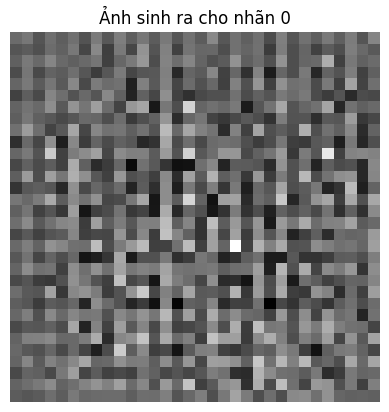

In [44]:
import matplotlib.pyplot as plt

# Hiển thị ảnh
plt.imshow(generated_image[0].squeeze(), cmap='gray')  # squeeze() để bỏ chiều thừa (1, 32, 32, 1) -> (32, 32)
plt.title("Ảnh sinh ra cho nhãn 0")
plt.axis('off')  # Tắt trục
plt.show()

# Lưu ảnh vào file
plt.imsave('generated_image_label_0.png', generated_image[0].squeeze(), cmap='gray')

# sử dụng mô hình để RandomForestClassifier để kiểm tra 

In [48]:
img_path = 'generated_image_label_0.png'
# Đọc ảnh từ file và chuyển đổi thành mảng pixel
img = Image.open(img_path).convert('L')
img_array = np.array(img).flatten().reshape(1, -1)

# Dự đoán nhãn cho ảnh
predicted_label = model.predict(img_array)
print(f'Predicted label for the image: {predicted_label[0]}')

Predicted label for the image: 0


c:\Users\voanh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


cGAN đã thành công tạo được ảnh đánh lừa mô hình RandomForestClassifier
